In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sales = pd.read_csv('SalesData.csv')

### 1. Compare Sales by region for 2016 with 2015 using bar chart

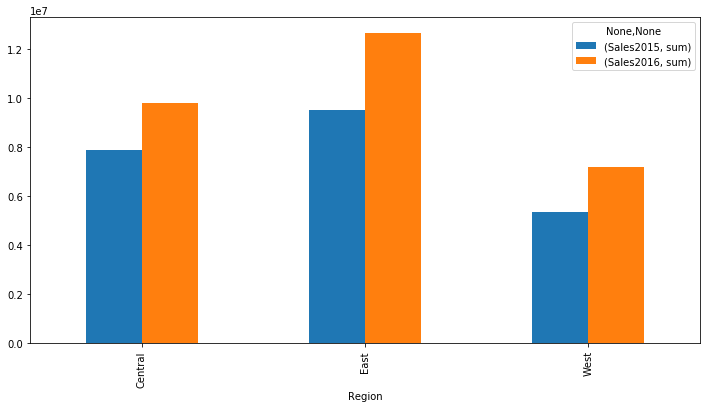

In [12]:
sales1 = sales.groupby(['Region'])['Sales2015','Sales2016'].aggregate(['sum'])
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [175]:
sales2 = sales.groupby(['Region']).aggregate({'TargetAchevied2016' : 'sum'})
sales2 = sales2.round(decimals=0)
sales2

,TargetAchevied2016
Region,
Central,1712.0
East,1664.0
West,1232.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E98520F4E0>],
      dtype=object)

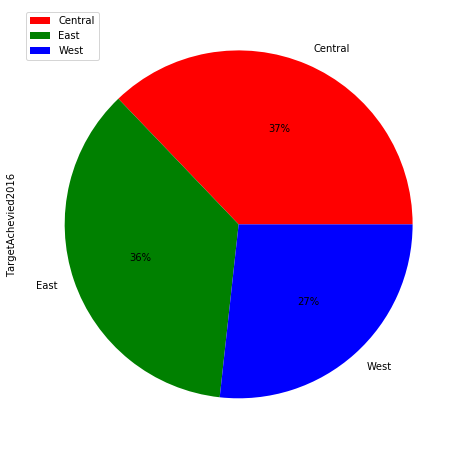

In [174]:
sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',
            figsize=(8,8))

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

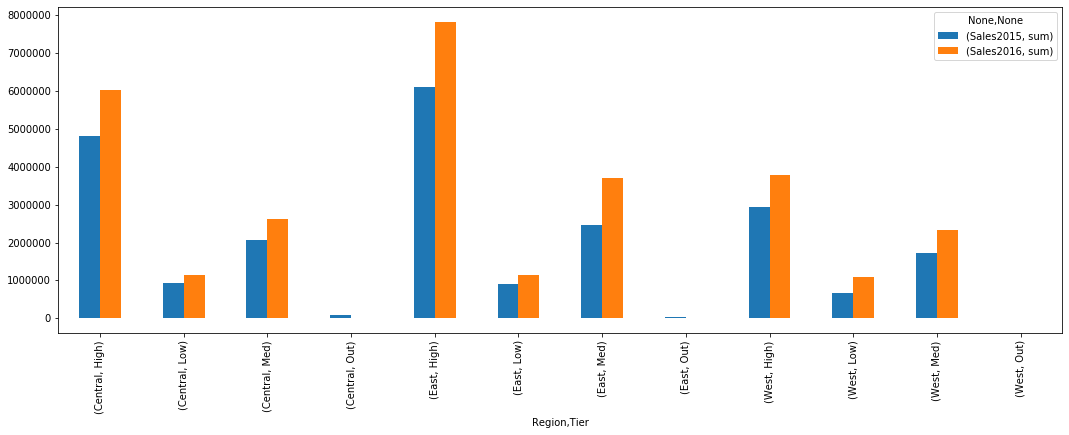

In [90]:
sales3 = sales.groupby(['Region','Tier'])['Sales2015','Sales2016'].aggregate(['sum'])
sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [50]:
 EastRegionSalesDF = sales[(sales['Region'] == 'East')].groupby('State')['Sales2015','Sales2016'].sum().reset_index()  

In [52]:
 EastRegionSalesDF[EastRegionSalesDF['Sales2016'] < EastRegionSalesDF['Sales2015']]

,State,Sales2015,Sales2016
10,NY,1725415.065,1703135.8


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [56]:
HighTierSalesDF = sales[(sales['Tier'] == 'High')].groupby('Division')['Units2015','Units2016'].sum().reset_index() 

In [57]:
HighTierSalesDF[HighTierSalesDF['Units2016'] < HighTierSalesDF['Units2015']]

,Division,Units2015,Units2016


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [80]:
def getQtr(month):
    if month in ["Jan","Feb","Mar"]:
        val = "Q1"
    elif month in ["Apr","May","Jun"]:
        val = "Q2"
    elif month in ["Jul","Aug","Sep"]:
        val = "Q3"
    else:
        val = "Q4"
    return val

In [83]:
sales['Qtr'] = np.where(sales['Month'] != '',sales['Month'].apply(getQtr) , "" )

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [87]:
QtrWiseSalesDF = sales.groupby('Qtr')['Sales2015','Sales2016'].sum()

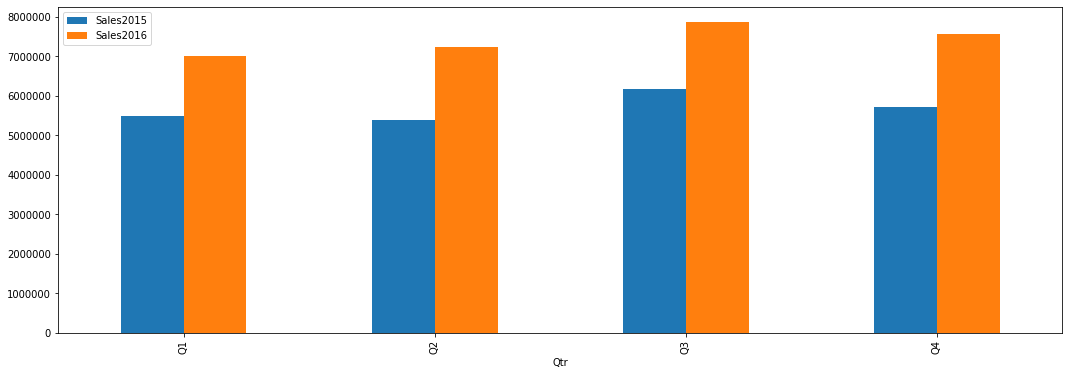

In [91]:
QtrWiseSalesGraph=QtrWiseSalesDF.plot.bar(figsize=(18,6))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [136]:
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Qtr','Tier']).aggregate({'Sales2016' : 'sum'})
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


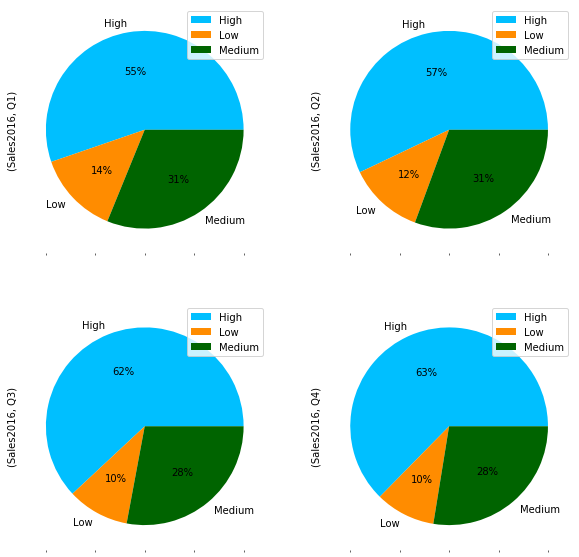

In [135]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()